<a href="https://colab.research.google.com/github/Rakeshnaidu03/Rakesh-Chanda/blob/main/ML_ICP5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

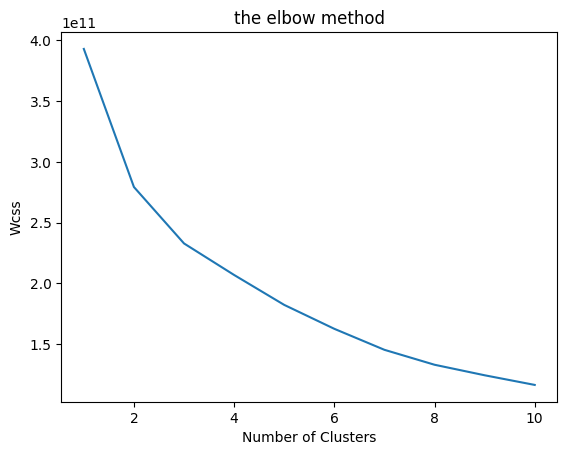

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhoutte score for just PCA: 0.5071586014140202


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhoutte score for scaled=pca=keans: 0.3286895409340767


In [19]:
1. #Importing the required libraried to perform the given tasks

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns

#Reading the data from the CC dataset.

cc_dataset=pd.read_csv('CC.csv')
dataset.head(10)

#Filling the null values in the dataset with the mean, by using the imputer.

X = dataset.iloc[:,1:]
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X)
X = imputer.transform(X)
X=pd.DataFrame(X)

#1-a. Applying PCA on CC dataset

pca = PCA(2)
x_pca = pca.fit_transform(X)
df2 = pd.DataFrame(data=x_pca)
finaldf = pd.concat([df2, X.iloc[:,-1]], axis=1)
finaldf.head(10)

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

# Applying k-means algorithm on the PCA result and report your observation if the silhouette score has improved or not?
nclusters = 4
km = KMeans(n_clusters=nclusters)
km.fit(finaldf)

y_cluster_kmeans = km.predict(finaldf)
score = metrics.silhouette_score(finaldf, y_cluster_kmeans)
#Printing out the Silhoutte score
print('Silhoutte score for just PCA:',score)

#Reloading the dataset again
X = cc_dataset.iloc[:,1:]

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X)

X = imputer.transform(X)
X=pd.DataFrame(X)
X.head()

#Applying the scaling

scaler = StandardScaler()
scaler.fit(X)
x_scaler = scaler.transform(X)

#Applying the PCA with k value as 2 again

pca = PCA(2)
x_pca = pca.fit_transform(x_scaler)
df2 = pd.DataFrame(data=x_pca)
finaldf = pd.concat([df2,cc_dataset[['TENURE']]],axis=1)
finaldf.head()

#Applying k-means on the scaled PCA output

noofclusters = 4
km = KMeans(n_clusters=noofclusters)
km.fit(x_pca)

y_cluster_kmeans = km.predict(x_pca)
#Finding out the silhouette score
score = metrics.silhouette_score(finaldf, y_cluster_kmeans)
print('Silhoutte score for scaled=pca=keans:',score)

In [20]:
2.#Importing the required libraried to perform the given tasks

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns

speech_df=pd.read_csv('pd_speech_features.csv')
speech_df.head()

#Applying the scaling on the dataset

x =speech_df.iloc[:,1:]
scaler = StandardScaler()
scaler.fit(x)
speech_x_scaler = scaler.transform(x)

#Applying PCA with value 3

pca = PCA(3)
speech_x_pca = pca.fit_transform(speech_x_scaler)
speech_df2 = pd.DataFrame(data=speech_x_pca)
speech_finaldf = pd.concat([speech_df2,speech_df[['class']]],axis=1)
print(speech_finaldf)

#Applying the SVM classifier

clf = SVC(kernel='linear')
x =speech_finaldf.iloc[:,:-1]
y =speech_finaldf.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
accuracy_score(y_test, y_pred)
print("SVM accuracy =", accuracy_score(y_test, y_pred))

#Classification report for the above classifier

print(classification_report(y_test, y_pred))

             0         1          2  class
0   -10.052430  1.476821  -6.828362      1
1   -10.641066  1.590409  -6.811682      1
2   -13.520081 -1.243921  -6.794539      1
3    -9.142525  8.848871  15.300295      1
4    -6.758090  4.624222  15.645682      1
..         ...       ...        ...    ...
751  22.377450  6.470193   1.439478      0
752  13.503269  1.450497   9.344865      0
753   8.328508  2.392507  -0.911216      0
754   4.074596  5.417624  -0.847044      0
755   4.052811  6.076459  -2.022246      0

[756 rows x 4 columns]
SVM accuracy = 0.768
              precision    recall  f1-score   support

           0       0.82      0.20      0.33        69
           1       0.76      0.98      0.86       181

    accuracy                           0.77       250
   macro avg       0.79      0.59      0.59       250
weighted avg       0.78      0.77      0.71       250



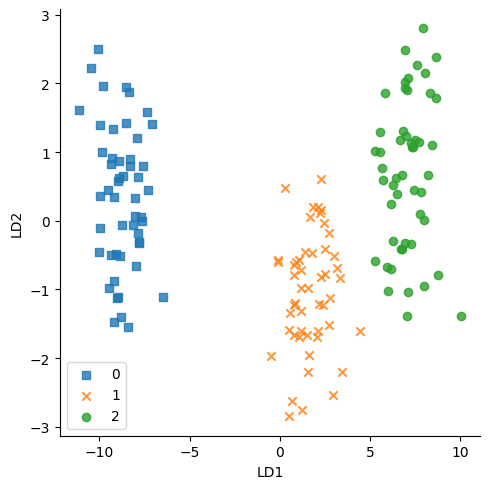

In [21]:
3. #Importing the required libraried to perform the given tasks

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns

#3 Reading the IRIS dataset
iris_df = pd.read_csv("Iris.csv")
iris_df.head()

#apply the standard scaling

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(iris_df.iloc[:,:-1].values)

#Label encoding the species column
class_le = LabelEncoder()
y = class_le.fit_transform(iris_df['Species'].values)

#Applying LDA on the Datset

lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_std,y)

data=pd.DataFrame(X_train_lda)
data['class']=y
data.columns=["LD1","LD2","class"]
data.head()

markers = ['s', 'x', 'o']
colors = ['y', 'b', 'g']
sns.lmplot(x="LD1", y="LD2", data=data, hue='class', markers=markers, fit_reg=False, legend=False)
plt.legend()
plt.show()